# Are Cigarette Sales Related to Median Income in the US? (Linear Regression)

In this notebook we want to see if the cigarette sales per capita in the United States are related to the average median income. After analyzing the sales per capita of Cigarette across the entire U.S. We wanted to look at different states and see if the relationship betwteen cigarette sales per capita and average median income differed from that of the entire U.S. We picked the different states
    
    California: we live here and there are a lot of anti-smoking laws in place
    West Virginia: one of the states with the highest cigarette sales and lowest average median incomes
    Maryland: one of the states with the highest median income
    Kentucky: one of the states with the highest cigarette sales and lowest average median incomes
    New Hampshire: one of the states with the highest cigarette sales and highest average median incomes
    
We are curious to see if the states with the highest number of sales per cigarette--West Virginia, Kentucky, and New Hampshire-- follow the same decreasing trend as the average median income increases. We decided to focus on states for this portion of our analysis because we the average median income for the entire United States does not hold the same value in each state. By looking at the data specific to each state, we can provide more accurate analysis of how the average median income impacts cigarette sales in certain areas of the country.

For this analysis we will be omitting the median income for every state from 2015 since the U.S._Chronic_Disease_Indicators__Tobacco.csv, where our data on cigarette sales comes from, does not contain information about the year 2015.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from project_tools.dataformat import *
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

## Loading and Processing Data

In [2]:
median_income = income_data_import().drop(["2015 Median income", "avg_med_income"], axis = 1)
sales_data = pd.read_csv("data/states_sales.csv")

## California

-0.9106961988762153

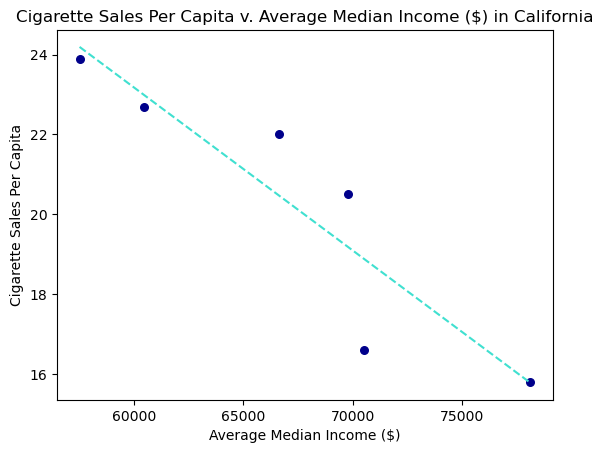

In [3]:
# get the median income for each year for the state, reverse order to the time in sales data
state_med = median_income.loc[median_income.state == "CA"].values[0, 1:7].astype(float)[::-1]
# get the sales data per capita
sales = sales_data.loc[sales_data.LocationAbbr == "CA"].DataValue.values

# perform simple linear regression
slope, intercept, r, p, std_err = stats.linregress(state_med, sales)
    # calulate prediction with regression values
prediction = (slope * state_med) + intercept
plt.scatter(state_med, sales, color = "#00008B", s = 30)
plt.plot(state_med, list(prediction), color = "#40E0D0", linestyle = "dashed")
plt.title("Cigarette Sales Per Capita v. Average Median Income ($) in California")
plt.xlabel("Average Median Income ($)")
plt.ylabel("Cigarette Sales Per Capita")
plt.savefig("output/california_regression.png")
r

The plot above illustrates that California's cigarette sales per capita follows the national average, it's linearly decreasing. We note that cigarette sales and median income in California have a strong linear correlation; however this could be caused by confounding variables that we are not considering here.

## West Virginia

-0.9243716700562894

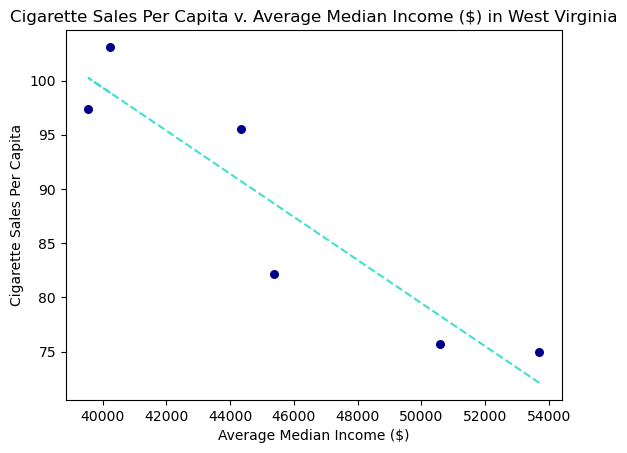

In [4]:
# get the median income for each year for the state, reverse order to the time in sales data
state_med = median_income.loc[median_income.state == "WV"].values[0, 1:7].astype(float)[::-1]
# get the sales data per capita
sales = sales_data.loc[sales_data.LocationAbbr == "WV"].DataValue.values

# perform simple linear regression
sl, intrcpt, r, p, std_err = stats.linregress(state_med, sales)
    # calulate prediction with regression values
pred = (sl * state_med) + intrcpt
plt.scatter(state_med, sales, color = "#00008B", s = 30)
plt.plot(state_med, list(pred), color = "#40E0D0", linestyle = "dashed")
plt.title("Cigarette Sales Per Capita v. Average Median Income ($) in West Virginia")
plt.xlabel("Average Median Income ($)")
plt.ylabel("Cigarette Sales Per Capita")
plt.savefig("output/west_virginia_regression.png")

r

This plot is very similar to California's. We have a strong linear correlation between average median income and cigarette sales. Although West Virginia citizen's are poorer on average than California's, they both tend to purchase less cigarette products as the average median income increases. The linear correlation between them is a bit stronger than California, but as stated earlier this can be beause of other factors that we haven't taken into account yet.

## Maryland

-0.9602763970167781

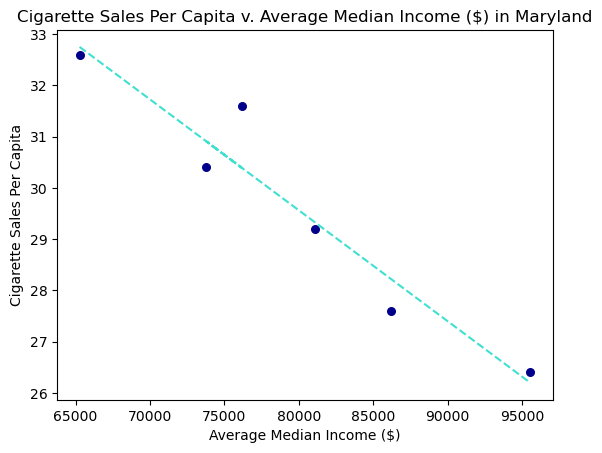

In [5]:
# get the median income for each year for the state, reverse order to the time in sales data
state_med = median_income.loc[median_income.state == "MD"].values[0, 1:7].astype(float)[::-1]
# get the sales data per capita
sales = sales_data.loc[sales_data.LocationAbbr == "MD"].DataValue.values

# perform simple linear regression
slope, intercept, r, p, std_err = stats.linregress(state_med, sales)
    # calulate prediction with regression values
prediction = (slope * state_med) + intercept
plt.scatter(state_med, sales, color = "#00008B", s = 30)
plt.plot(state_med, list(prediction), color = "#40E0D0", linestyle = "dashed")
plt.title("Cigarette Sales Per Capita v. Average Median Income ($) in Maryland")
plt.xlabel("Average Median Income ($)")
plt.ylabel("Cigarette Sales Per Capita")
plt.savefig("output/maryland_regression.png")

r

Maryland's cigarette sales per capita appears to be linearly, decreasing when average median income increases. This follows what we saw on a national level. There also appears to be a strong correlation between cigarette sales per capita and average median income (as discussed earlier this could be because of other factors that we have not taken into account). So the relationship between median income and cigarette sales appears to be stronger in Maryland, a wealthier state, when compared to California and West Virginia.


## Kentucky

-0.8949288982464796

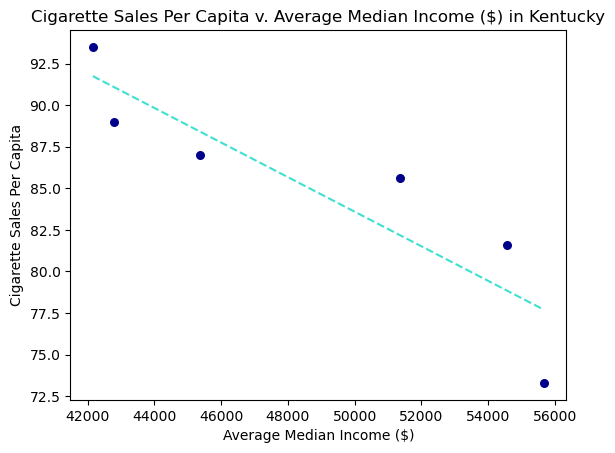

In [6]:
# get the median income for each year for the state, reverse order to the time in sales data
state_med = median_income.loc[median_income.state == "KY"].values[0, 1:7].astype(float)[::-1]
# get the sales data per capita
sales = sales_data.loc[sales_data.LocationAbbr == "KY"].DataValue.values

# perform simple linear regression
slope, intercept, r, p, std_err = stats.linregress(state_med, sales)
 # calulate prediction with regression values
prediction = (slope * state_med) + intercept
plt.scatter(state_med, sales, color = "#00008B", s = 30)
plt.plot(state_med, list(prediction), color = "#40E0D0", linestyle = "dashed")
plt.title("Cigarette Sales Per Capita v. Average Median Income ($) in Kentucky")
plt.xlabel("Average Median Income ($)")
plt.ylabel("Cigarette Sales Per Capita")
plt.savefig("output/kentucky_regression.png")
r

Kentucky's cigarette sales per capita appears to be linearly, decreasing when average median income increases. However, the correlation between sales and median income is not as strong as the previous states. So we are going to look at the residual plots to see there are any visible patterns that may indicate that the relationship is not linear.



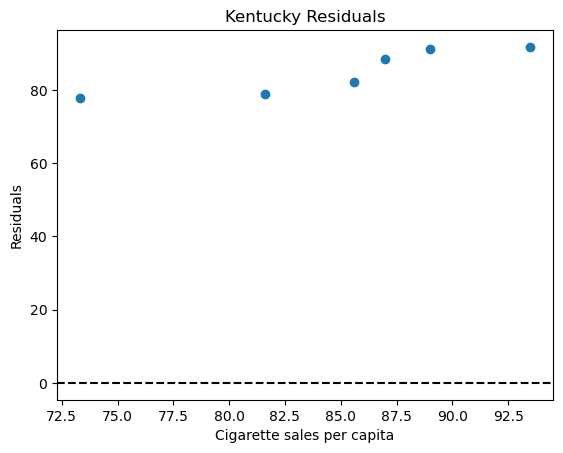

In [7]:
#residual = actual - predicted
resids = sales - prediction
plt.scatter(sales, prediction)
plt.ylabel("Residuals")
plt.xlabel("Cigarette sales per capita")
plt.title("Kentucky Residuals")
plt.axhline(0, color = "black", linestyle = "dashed")
plt.savefig("output/kentucky_residuals.png")


We can see that our that there is a clear pattern in our residual plot. This indicates that the relationship between sales per capita and median income in Kentucky do not have a linear relationship. This is in contrast with the relationship between the previous states and the U.S. Since we did not see a clear divide among the relationships of states that had lower median incomes and states that had higher median incomes we cannot provide a conclusion and require more indepth analysis

## New Hampshire

-0.908524301607584

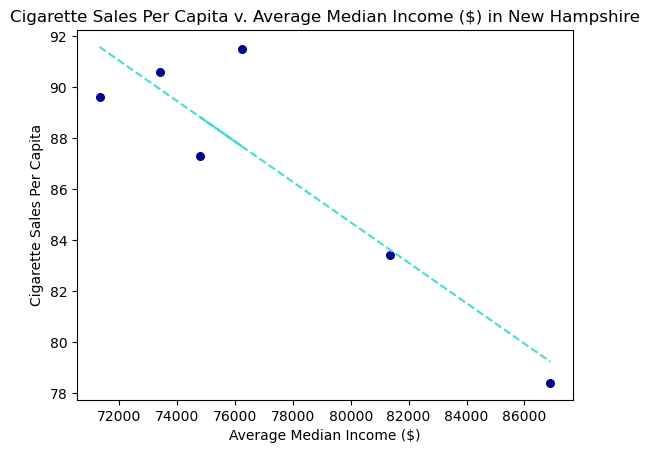

In [8]:
# get the median income for each year for the state, reverse order to the time in sales data
state_med = median_income.loc[median_income.state == "NH"].values[0, 1:7].astype(float)[::-1]
# get the sales data per capita
sales = sales_data.loc[sales_data.LocationAbbr == "NH"].DataValue.values

# perform simple linear regression
slope, intercept, r, p, std_err = stats.linregress(state_med, sales)
    # calulate prediction with regression values
prediction = (slope * state_med) + intercept
plt.scatter(state_med, sales, color = "#00008B", s = 30)
plt.plot(state_med, list(prediction), color = "#40E0D0", linestyle = "dashed")
plt.title("Cigarette Sales Per Capita v. Average Median Income ($) in New Hampshire")
plt.xlabel("Average Median Income ($)")
plt.ylabel("Cigarette Sales Per Capita")
plt.savefig("output/newHampshire_regression.png")

r

We can see that the cigarette sales tend to decrease as the average median income increases. Our data points do not look like they follow a completely linear pattern, and we will plot the residuals to see if we can determine more information about the relationship between income and cigarette sales.

#### Residual Plot

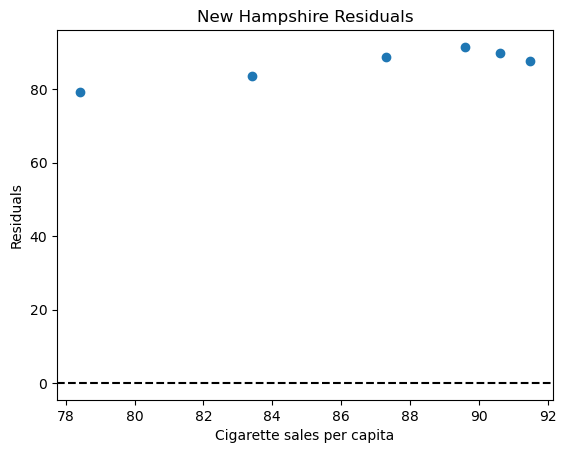

In [9]:
#residual = actual - predicted
resids = sales - prediction
plt.scatter(sales, prediction)
plt.ylabel("Residuals")
plt.xlabel("Cigarette sales per capita")
plt.title("New Hampshire Residuals")
plt.axhline(0, color = "black", linestyle = "dashed")
plt.savefig("output/new_hampshire_residuals.png")


We can see that there is a clear pattern that is similar to what we saw in Kentucky's residual plot. This can lead us to believe that in certain states with high cigarette state sales per capita in comparison to the rest of the country, there is not a linear relationship between median income and cigarette sales. Whereas in other states that do no have the highest sales, there is a linear relationship between average median income and cigarette sales.

## Concluding Thoughts

Looking at these states we can see that cigarette sales are decreasing throughout the country. However, in states where cigarette sales per capita consistently remain higher than the national average, there appears to be a non-linear relationship between average median income and cigarette sales. When we tried to model cigarette sales using the average median income in both New Hampshire and Kentucky through simple linear regression, we found that these variables did not have a strong linear relationship. After creating the residual plots for both of these states, we observed a similar pattern. This lets us conclude that the relationship between cigarette sales and average median income is not linear in these states. 

Our analysis of these 5 states do not let us come to a statistically sound conclusion. We would need to perform more regorous testing and on more states to properly draw a conclusion. From what we observed through our linear regression analysis, there is a linear relationship between cigarette sales per capita and average median income in each state, where we are seeing a decrease in cigarette sales per capita as the average median income increases,  except in states where the cigarette sales per capita are high.